In [58]:
from pathlib import Path
import keras
from keras.preprocessing import image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [9]:
DIR_IN = '/home/khanhhh/data_1/courses/practical_project_1/codes/dataset/RissArchiv/Eugen Müller'

In [ ]:
%load_ext autoreload
%autoreload 1
from util import extract_patch_1
import matplotlib.pyplot as plt
import cv2 as cv

win_size = 227
h = int(win_size/2)
for path in Path(DIR_IN).glob('*.*'):
    #print('hihi')
    img = cv.imread(str(path))
    patches, patch_locs = extract_patch_1(img, h, offset=0, stride=win_size)
    patches_1, patch_locs_1 = extract_patch_1(img, h, offset=h, stride=win_size)
    break

In [43]:
TEST_DIR_PATCH = '/home/khanhhh/data_1/courses/practical_project_1/codes/dataset/RissArchiv/Test_patches/'

In [24]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
        TEST_DIR_PATCH,
        target_size=(224,224),
        batch_size=100,
        class_mode= None)

Found 28904 images belonging to 1 classes.


In [66]:
test_generator.filenames[:10]

['Test_Patches/1 Original_1008_1008.png',
 'Test_Patches/1 Original_1008_112.png',
 'Test_Patches/1 Original_1008_1232.png',
 'Test_Patches/1 Original_1008_1456.png',
 'Test_Patches/1 Original_1008_1680.png',
 'Test_Patches/1 Original_1008_1904.png',
 'Test_Patches/1 Original_1008_2128.png',
 'Test_Patches/1 Original_1008_2352.png',
 'Test_Patches/1 Original_1008_2576.png',
 'Test_Patches/1 Original_1008_2800.png']

In [25]:
preds = model.predict_generator(test_generator, steps=len(test_generator))

In [31]:
pred_idxs = np.argmax(preds, axis = 1)

In [46]:
TEST_DIR = '/home/khanhhh/data_1/courses/practical_project_1/codes/dataset/RissArchiv/Test/'
img_paths = [path for path in Path(TEST_DIR).glob('*.*')]    

In [68]:
patch_paths = [Path(name) for name in test_generator.filenames]

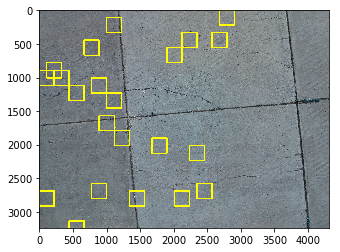

In [69]:
h = int(224/2)
for img_path in img_paths:
    img_name = img_path.stem
    img_crack_patch_paths = []
    for path, cls in zip(patch_paths, pred_idxs):
        if cls == 0 and img_name in path.stem:
            img_crack_patch_paths.append(path)
            
    locs = []
    for path in img_crack_patch_paths:
        loc_str = path.stem.split('_')[1:]
        assert len(loc_str) == 2
        locs.append([int(loc_str[0]), int(loc_str[1])])
        
    img = cv.imread(str(img_path))
    for loc in locs:
        pt0 = (loc[0]-h, loc[1]-h)
        pt1 = (loc[0]+h, loc[1]+h)
        cv.rectangle(img, pt0, pt1, color=(255,255,0), thickness=20)
        #break
    plt.imshow(img)
    break